In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.
C:\Users\peravit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peravit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peravit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peravit\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
batch_size = 128

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'C:/Users/peravit/Desktop/IMG/handtracking/binary_train/',
    target_size=(30, 30),
    color_mode='grayscale',
    batch_size=batch_size,
    
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    'C:/Users/peravit/Desktop/IMG/handtracking/binary_test/',
    target_size=(30, 30),
    color_mode='grayscale',
    batch_size=batch_size,
    
    class_mode='categorical'
)

Found 1555 images belonging to 6 classes.
Found 105 images belonging to 6 classes.


Text(0.5,0,'Class')

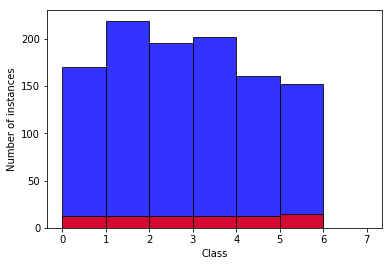

In [14]:
h1, _, _ = plt.hist(
    train_gen.classes, 
    bins=range(8), 
    alpha=.8, 
    color='blue', 
    edgecolor='black'
)
h2, _, _ = plt.hist(
    test_gen.classes, 
    bins=range(8), 
    alpha=.8, 
    color='red', 
    edgecolor='black'
)
plt.ylabel('Number of instances')
plt.xlabel('Class')

(128, 28, 28, 1) (128, 6)


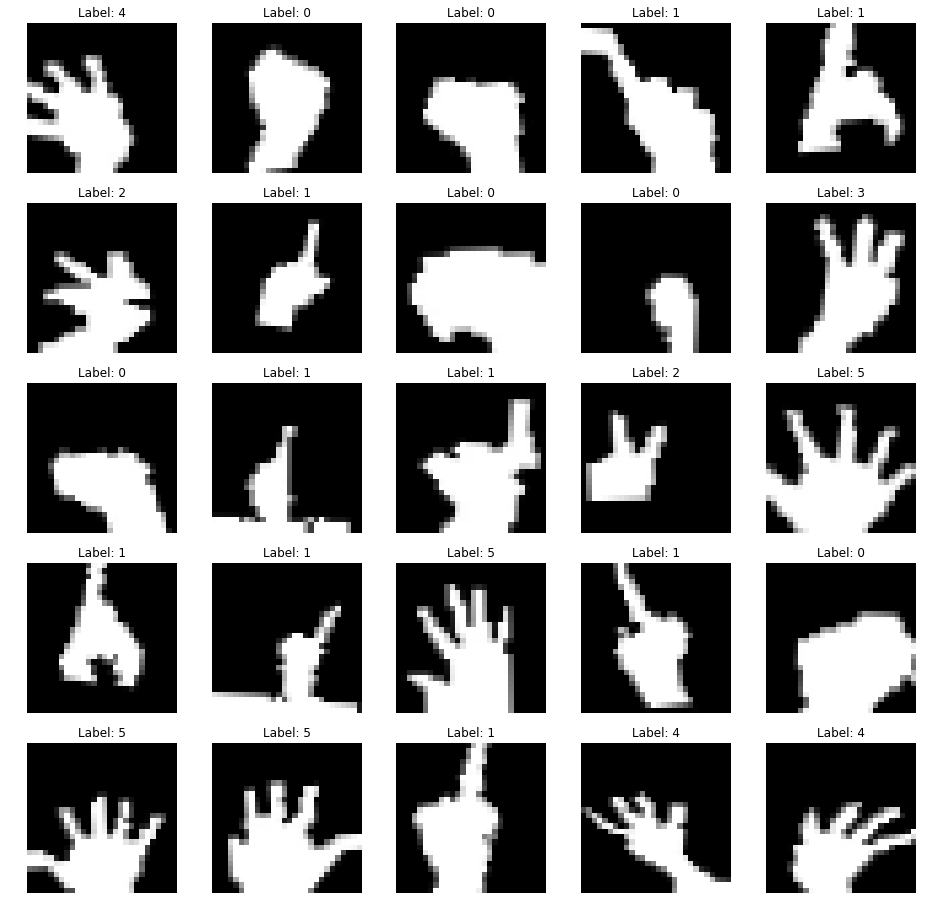

In [3]:
X, y = train_gen.next()
print(X.shape, y.shape)

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.title('Label: %d' % np.argmax(y[i]))
    img = np.uint8(255*X[i, :, :, 0])
    plt.imshow(img, cmap='gray')

In [3]:
model = Sequential()
model.add(Conv2D(128, (5,5), activation='relu', input_shape=(30, 30, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       3328      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                

In [3]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(30, 30, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)        

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)         

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [5]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5')
]

In [6]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=120,
    epochs=30,
    validation_data=test_gen,
    validation_steps=30,
    callbacks=None
)


Epoch 1/30
120/120 [==============================] - 105s 876ms/step - loss: 1.1383 - acc: 0.5272 - val_loss: 0.6303 - val_acc: 0.6952
Epoch 2/30
120/120 [==============================] - 110s 920ms/step - loss: 0.7873 - acc: 0.7105 - val_loss: 0.5386 - val_acc: 0.7905
Epoch 3/30
120/120 [==============================] - 111s 927ms/step - loss: 0.5546 - acc: 0.7982 - val_loss: 0.3618 - val_acc: 0.8762
Epoch 4/30
120/120 [==============================] - 110s 920ms/step - loss: 0.4377 - acc: 0.8494 - val_loss: 0.3747 - val_acc: 0.8857
Epoch 5/30
120/120 [==============================] - 112s 930ms/step - loss: 0.3995 - acc: 0.8670 - val_loss: 0.2781 - val_acc: 0.9143
Epoch 6/30
120/120 [==============================] - 111s 923ms/step - loss: 0.3142 - acc: 0.8896 - val_loss: 0.2625 - val_acc: 0.8952
Epoch 7/30
120/120 [==============================] - 110s 920ms/step - loss: 0.2995 - acc: 0.8935 - val_loss: 0.2297 - val_acc: 0.8952
Epoch 8/30
120/120 [===========================

Text(0.5,0,'Epochs')

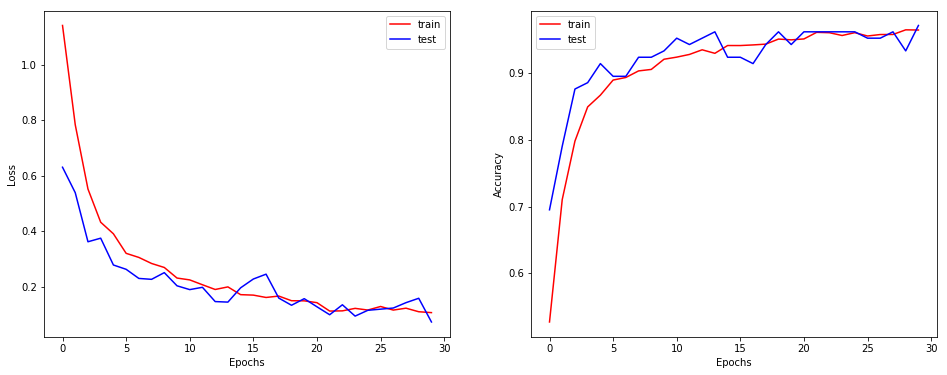

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_loss'], 'b-', label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['acc'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_acc'], 'b-', label='test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [8]:
model.save("model_13.h5")

In [23]:
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
# model = get_model()
# model.load_weights('C:/Users/peravit/Desktop/IMG/handtracking/model_11.h5')
model = load_model('model_11.h5')

In [20]:
from keras.layers import Input
from keras.models import Model

newInput = Input(batch_shape=(None,26,64,1))
newOutputs = oldModel1(newInput)
newModel = Model(newInput,newOutputs)
newModel.set_weights(oldModel1.get_weights())

In [26]:
# Path to your folder testing data
testing_folder = 'C:/Users/peravit/Desktop/IMG/handtracking/for_test'
# Image size (set up the image size used for training)
img_size = 30
# Batch size (you should tune it based on your memory)
batch_size = 128

val_datagen = ImageDataGenerator(
    rescale=1. / 255)
validation_generator = val_datagen.flow_from_directory(
    testing_folder,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False,
    class_mode='categorical',
    classes=['0','1','2','3','4','5']
)    

Found 136 images belonging to 6 classes.


In [42]:
import numpy
from sklearn.metrics import classification_report
steps = 30
predictions = model.predict_generator(validation_generator, steps=steps)
predicted_classes = numpy.argmax(predictions, axis=1)

In [47]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
class_labels

['0', '1', '2', '3', '4', '5']

In [ ]:
confusion_matrix(test_labels_array.argmax(axis=1), pred.argmax(axis=1))

In [48]:
report = classification_report(true_classes.argmax(axis=1), predictions.argmax(axis=1), target_names=class_labels)
print(report) 

AxisError: axis 1 is out of bounds for array of dimension 1

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
cm =confusion_matrix(val_trues, val_preds)

ValueError: Found input variables with inconsistent numbers of samples: [136, 2040]

In [ ]:
labels = validation_generator.class_indices.keys()
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)